In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from utils import format_axes
import numpy as np

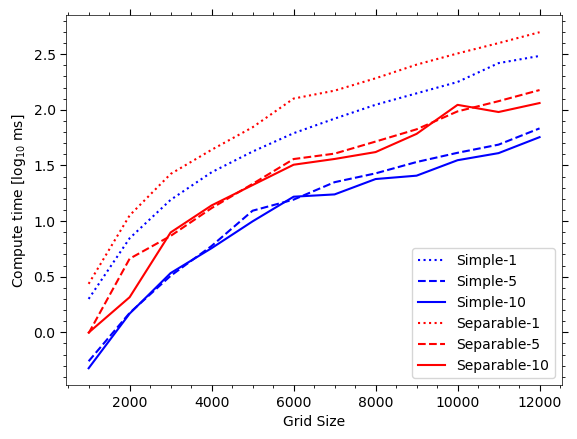

In [46]:
conv_df = pd.read_csv('convolutions.csv')

fig, ax = plt.subplots()

conv_df['duration'] = np.log10(conv_df['duration'])

for method in conv_df['method'].unique():
    for num_threads in conv_df['num_threads'].unique():

        subset = conv_df[(conv_df['method'] == method) & (conv_df['num_threads'] == num_threads)]

        colors = {
            'simple_convolve': 'blue', 
            'separable_convolution': 'red'
        }

        m = {
            'simple_convolve': 'Simple', 
            'separable_convolution': 'Separable'
        }

        ls = {
            1: ':',
            5: '--',
            10: '-'
        }

        plt.plot(subset['grid_size'], subset['duration'], c=colors[method], label=f'{m[method]}-{num_threads}', ls=ls[num_threads])

plt.xlabel('Grid Size')
plt.ylabel('Compute time [log$_{10}$ ms]')
plt.legend()
format_axes(ax)

plt.savefig('convolutions.png', bbox_inches='tight')

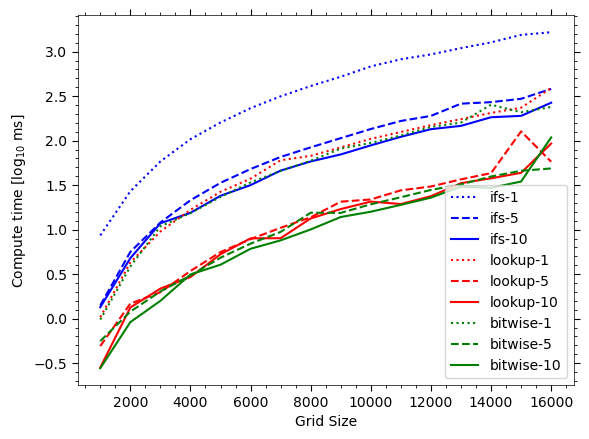

In [45]:
trans_df = pd.read_csv('transitions.csv')

fig, ax = plt.subplots()

trans_df['duration'] = np.log10(trans_df['duration'])

for method in trans_df['method'].unique():
    for num_threads in trans_df['num_threads'].unique():

        subset = trans_df[(trans_df['method'] == method) & (trans_df['num_threads'] == num_threads)]

        colors = {
            'ifs': 'blue', 
            'lookup': 'red',
            'bitwise': 'green'
        }

        ls = {
            1: ':',
            5: '--',
            10: '-'
        }

        plt.plot(subset['grid_size'], subset['duration'], c=colors[method], label=f'{method}-{num_threads}', ls=ls[num_threads])

plt.xlabel('Grid Size')
plt.ylabel('Compute time [log$_{10}$ ms]')
plt.legend()
format_axes(ax)

plt.savefig('transitions.png', bbox_inches='tight')